In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import sklearn
import pandas as pd

training_data = pd.read_csv('./as1-bank.csv')
training_data = training_data.drop(columns= ['pdays','poutcome','previous','default'])
#training_data = training_data.drop(columns= ['marital', 'default','education','pdays'])

training_data['balance'] = training_data['balance'].astype(float)
training_data['duration'] = training_data['duration'].astype(float)
training_data['age'] = training_data['age'].astype(float)



training_y = training_data.pop('y')

training_y.replace("yes", 1, inplace=True)
training_y.replace("no", 0, inplace=True)
training_y.value_counts()
training_x = training_data
training_x.replace("yes", 1, inplace=True)
training_x.replace("no",0, inplace=True)

training_y = training_y.astype(float)



print (training_y)

arr_train_x = training_x.to_numpy()
arr_train_y = training_y.to_numpy()

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
7837    0.0
7838    1.0
7839    1.0
7840    1.0
7841    0.0
Name: y, Length: 7842, dtype: float64


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
(548, 9)
(7294, 9)
(548,)
(7294,)
Epoch 1/6
16/16 [==============================] - 0s 11ms/step - loss: 35.2496 - accuracy: 0.7241 - val_loss: 0.6458 - val_accuracy: 0.7636
Epoch 2/6
16/16 [==============================] - 0s 4ms/step - loss: 12.8259 - accuracy: 0.7667 - val_loss: 0.6496 - val_accuracy: 0.7636
Epoch 3/6
16/16 [==============================] - 0s 5ms/step - loss: 3.2407 - accuracy: 0.7667 - val_loss: 0.6415 - val_accuracy: 0.7636
Epoch 4/6
16/16 [==============================] - 0s 4ms/step -

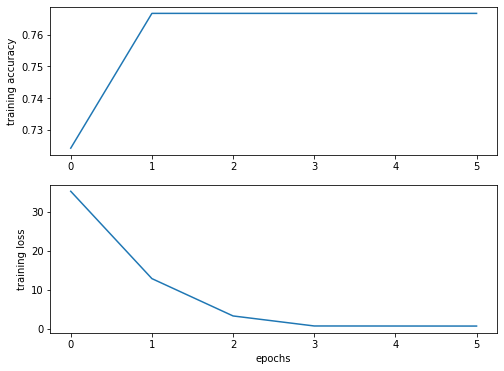

===== Test Loss and Test Accuracy====
228/228 [==============================] - 0s 1ms/step - loss: 3.3953 - accuracy: 0.7665
test Loss = 3.3953115940093994 test Accuracy = 0.7665204405784607
[[0.44609627]
 [0.44609627]
 [0.44609627]
 ...
 [0.44609627]
 [0.44609627]
 [0.44609627]]
===== Evaluation metrics====
[[5591   42]
 [1661    0]]
TP: 0
FP: 42
TN: 5591
FN: 1661
===== Visualisation evaluation metrics ====


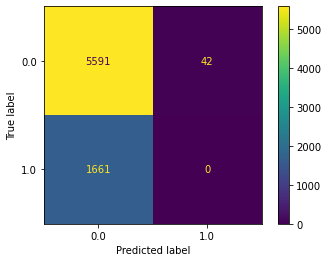

Using SKLEARN.
Accuracy: 0.7665204277488347
No utility for specificity alone
Sensitivity: 0.0
Precision: 0.0
F1-Score: 0.0
(7294,)
(7294, 1)
===== Classification Report ====
              precision    recall  f1-score   support

         0.0       0.77      0.99      0.87      5633
         1.0       0.00      0.00      0.00      1661

    accuracy                           0.77      7294
   macro avg       0.39      0.50      0.43      7294
weighted avg       0.60      0.77      0.67      7294



In [8]:
# Model1
model = keras.Sequential()

model.add(layers.InputLayer(input_shape=(9))) 

model.add(layers.Dense(10, activation="relu"))

model.add(layers.Dense(1, activation="sigmoid")) 

model.summary()

model.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)
from sklearn.model_selection import train_test_split
training_x, testing_x, training_y, testing_y = train_test_split(
training_x, training_y, test_size=0.93, random_state=2, shuffle=True, stratify=training_y)
print(training_x.shape)
print(testing_x.shape)

print(training_y.shape)
print(testing_y.shape)

model_training_history = model.fit(
training_x,
training_y,
epochs = 6,
validation_split=0.1,
)

print("===== Training Loss and Training Accuracy====")



print(model_training_history.history.keys())
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))
acc = model_training_history.history['accuracy']
loss = model_training_history.history['loss']

ax1.plot(acc)
ax2.plot(loss)
    
ax1.set_ylabel('training accuracy')
ax2.set_ylabel('training loss')
ax2.set_xlabel('epochs')
plt.show()
print("===== Test Loss and Test Accuracy====")
test_loss, test_acc = model.evaluate(testing_x, testing_y)
print("test Loss =",test_loss,"test Accuracy =",test_acc)
y_pred = model.predict(testing_x)
print(y_pred)

print("===== Evaluation metrics====")

from sklearn.metrics import confusion_matrix
print(confusion_matrix(testing_y, np.round(y_pred) ))
tn, fp, fn, tp = confusion_matrix(testing_y, np.round(y_pred) ).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")

print("===== Visualisation evaluation metrics ====")

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(testing_y, np.round(y_pred))
plt.show()

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

print("Using SKLEARN.")

print(f"Accuracy: {accuracy_score(testing_y, y_pred.round())}")
print(f"No utility for specificity alone")
print(f"Sensitivity: {recall_score(testing_y, y_pred.round())}")
print(f"Precision: {precision_score(testing_y, y_pred.round())}")
print(f"F1-Score: {f1_score(testing_y, y_pred.round())}")
print(testing_y.shape)
print(y_pred.shape)


print("===== Classification Report ====")


from sklearn.metrics import classification_report
print(classification_report(testing_y, np.round(y_pred)))


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32)                128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 1,665
Trainable params: 1,537
Non-trainable params: 128
__________________________________________________

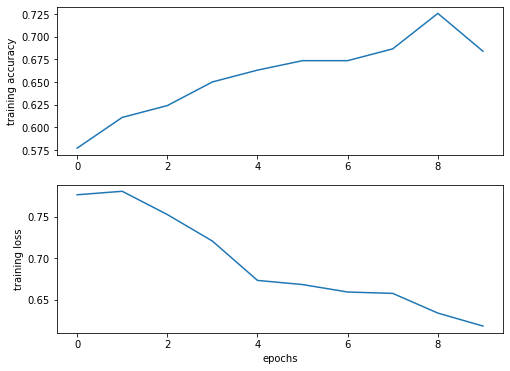

[[0.5572261 ]
 [0.6103932 ]
 [0.36814833]
 ...
 [0.42158377]
 [0.42948312]
 [0.35417348]]
[[4807  826]
 [1025  636]]
TP: 636
FP: 826
TN: 4807
FN: 1025


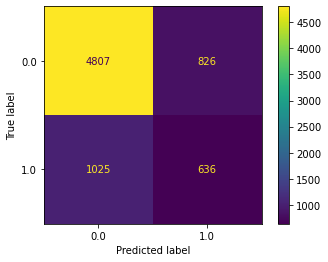

Using SKLEARN.
Accuracy: 0.7462297778996435
No utility for specificity alone
Sensitivity: 0.38290186634557494
Precision: 0.43502051983584133
F1-Score: 0.4073006724303555
(7294,)
(7294, 1)


In [9]:
# https://github.com/VITA-Group/BNN_NoBN/blob/main/README.md



model5 = keras.Sequential()

model5.add(layers.InputLayer(input_shape=(9))) 

model5.add(layers.Dense(32, activation="relu"))
model5.add(layers.BatchNormalization())

model5.add(layers.Dense(32, activation="relu"))
model5.add(layers.BatchNormalization())

model5.add(layers.Dropout(0.5))



model5.add(layers.Dense(1, activation="sigmoid")) 

model5.summary()

model5.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)
# Using train, test, val datasets from before.
model5_training_history = model5.fit(
    training_x,
    training_y,
    epochs = 10,
    validation_split = 0.3
)
test_loss, test_acc = model5.evaluate(testing_x, testing_y)
print("test Loss =",test_loss,"test Accuracy =",test_acc)

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))
acc = model5_training_history.history['accuracy']
loss = model5_training_history.history['loss']

ax1.plot(acc)

ax2.plot(loss)
    

ax1.set_ylabel('training accuracy')
ax2.set_ylabel('training loss')
ax2.set_xlabel('epochs')
plt.show()

y_pred5 = model5.predict(testing_x)
print(y_pred5)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(testing_y, np.round(y_pred5) ))
tn, fp, fn, tp = confusion_matrix(testing_y, np.round(y_pred5) ).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(testing_y, np.round(y_pred5))
plt.show()

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

print("Using SKLEARN.")

print(f"Accuracy: {accuracy_score(testing_y, y_pred5.round())}")
print(f"No utility for specificity alone")
print(f"Sensitivity: {recall_score(testing_y, y_pred5.round())}")
print(f"Precision: {precision_score(testing_y, y_pred5.round())}")
print(f"F1-Score: {f1_score(testing_y, y_pred5.round())}")
print(testing_y.shape)
print(y_pred5.shape)